## Andrew Goldblatt - Penguin Classification Using Biased and Biased Reduced Synthetic Datasets

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#read in data
train_df = pd.read_csv("penguins_train.csv").drop(columns=['Unnamed: 0','Island'])

#replace sex variables with dummy variables 
train_df['Sex'].replace(['FEMALE', 'MALE'],
                        [1, 0], inplace=True)
#drop NA
train_df = train_df.dropna()


In [218]:
#view penguin dataset
train_df

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Chinstrap,50.1,17.9,190.0,3400.0,1.0
1,Gentoo,47.5,15.0,218.0,4950.0,1.0
2,Gentoo,50.0,15.2,218.0,5700.0,0.0
3,Adelie,41.1,17.5,190.0,3900.0,0.0
4,Gentoo,47.7,15.0,216.0,4750.0,1.0
...,...,...,...,...,...,...
252,Chinstrap,55.8,19.8,207.0,4000.0,0.0
253,Adelie,35.5,17.5,190.0,3700.0,1.0
254,Adelie,36.4,17.1,184.0,2850.0,1.0
255,Adelie,41.1,19.0,182.0,3425.0,0.0


In [4]:
#create dataframes for each species 
chinstrap_df = train_df[train_df["Species"] == "Chinstrap"]
adelie_df = train_df[train_df["Species"] == "Adelie"]
gentoo_df = train_df[train_df["Species"] == "Gentoo"]

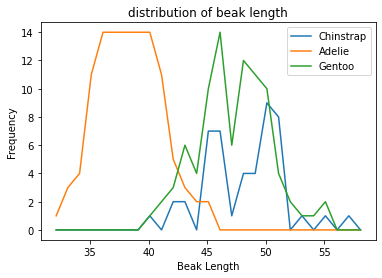

In [5]:
#view beak length distribution for the different species

list1 = chinstrap_df["Beak Length (mm)"]
list2 = adelie_df["Beak Length (mm)"]
list3 = gentoo_df["Beak Length (mm)"]

bins = np.arange(min(min(list1), min(list2), min(list3)), max(max(list1), max(list2), max(list3)) + 1.5, 1)
hist1, _ = np.histogram(list1, bins=bins)
hist2, _ = np.histogram(list2, bins=bins)
hist3, _ = np.histogram(list3, bins=bins)

# Plotting histograms as lines
plt.plot(bins[:-1], hist1, label='Chinstrap')
plt.plot(bins[:-1], hist2, label='Adelie')
plt.plot(bins[:-1], hist3, label='Gentoo')

# Adding labels and title
plt.xlabel('Beak Length')
plt.ylabel('Frequency')
plt.title('distribution of beak length')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


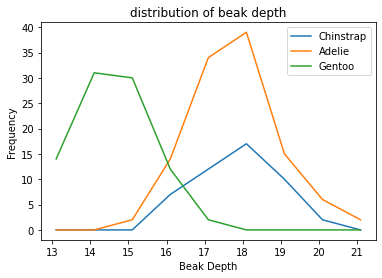

In [6]:
#view beak depth distribution for the different species

list1 = chinstrap_df["Beak Depth (mm)"]
list2 = adelie_df["Beak Depth (mm)"]
list3 = gentoo_df["Beak Depth (mm)"]

bins = np.arange(min(min(list1), min(list2), min(list3)), max(max(list1), max(list2), max(list3)) + 1.5, 1)
hist1, _ = np.histogram(list1, bins=bins)
hist2, _ = np.histogram(list2, bins=bins)
hist3, _ = np.histogram(list3, bins=bins)

# Plotting histograms as lines
plt.plot(bins[:-1], hist1, label='Chinstrap')
plt.plot(bins[:-1], hist2, label='Adelie')
plt.plot(bins[:-1], hist3, label='Gentoo')

# Adding labels and title
plt.xlabel('Beak Depth')
plt.ylabel('Frequency')
plt.title('distribution of beak depth')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


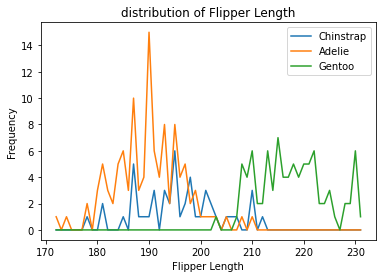

In [7]:
#view flipper length distribution for the different species

list1 = chinstrap_df["Flipper Length (mm)"]
list2 = adelie_df["Flipper Length (mm)"]
list3 = gentoo_df["Flipper Length (mm)"]

bins = np.arange(min(min(list1), min(list2), min(list3)), max(max(list1), max(list2), max(list3)) + 1.5, 1)
hist1, _ = np.histogram(list1, bins=bins)
hist2, _ = np.histogram(list2, bins=bins)
hist3, _ = np.histogram(list3, bins=bins)

# Plotting histograms as lines
plt.plot(bins[:-1], hist1, label='Chinstrap')
plt.plot(bins[:-1], hist2, label='Adelie')
plt.plot(bins[:-1], hist3, label='Gentoo')

# Adding labels and title
plt.xlabel('Flipper Length')
plt.ylabel('Frequency')
plt.title('distribution of Flipper Length')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


# Artificially Create Class Distribution Bias Datasets

In [223]:
### 50/50 split

In [11]:
gentoo_50 = gentoo_df.sample(50)
adelie_50 = adelie_df.sample(50)
bias_0 = pd.concat([gentoo_50,adelie_50])
bias_0['Species'].replace(['Gentoo', 'Adelie'],
                        [1, 0], inplace=True)
bias_0.head(5)

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
31,1,42.7,13.7,208.0,3950.0,1.0
97,1,45.7,13.9,214.0,4400.0,1.0
125,1,42.9,13.1,215.0,5000.0,1.0
145,1,49.5,16.2,229.0,5800.0,0.0
219,1,48.1,15.1,209.0,5500.0,0.0


In [10]:
gentoo_75 = gentoo_df.sample(75)
adelie_25 = adelie_df.sample(25)
bias_75 = pd.concat([gentoo_75,adelie_25])
bias_75['Species'].replace(['Gentoo', 'Adelie'],
                        [1, 0], inplace=True)
bias_75.head(5)

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
75,1,44.9,13.3,213.0,5100.0,1.0
163,1,43.8,13.9,208.0,4300.0,1.0
1,1,47.5,15.0,218.0,4950.0,1.0
160,1,45.3,13.8,208.0,4200.0,1.0
19,1,46.2,14.9,221.0,5300.0,0.0


In [12]:
gentoo_90 = gentoo_df.sample(89)
adelie_10 = adelie_df.sample(10)
bias_90 = pd.concat([gentoo_90,adelie_10])
bias_90['Species'].replace(['Gentoo', 'Adelie'],
                        [1, 0], inplace=True)
bias_90.head(5)

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
135,1,45.2,16.4,223.0,5950.0,0.0
111,1,49.9,16.1,213.0,5400.0,0.0
184,1,48.7,15.1,222.0,5350.0,0.0
198,1,50.0,15.9,224.0,5350.0,0.0
29,1,42.6,13.7,213.0,4950.0,1.0


In [228]:
bias_90.to_csv("bias_90_to_gretel.csv")
bias_75.to_csv("bias_75_to_gretel.csv")

Export to Gretel.AI's minority class boosting algorithm and boost minority penguin class  

https://gretel.ai/blog/improving-massively-imbalanced-datasets-in-machine-learning-with-synthetic-data

# Classification

## create test set

In [13]:
test_set = pd.read_csv("penguins_test.csv").drop(columns=['Unnamed: 0','Island'])
test_set = test_set[test_set["Species"] != "Chinstrap"]

test_set['Species'].replace(['Gentoo', 'Adelie'],
                        [1, 0], inplace=True)
test_set= test_set.drop(columns='Sex')


In [14]:
test_set.sample(5)

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
36,0,42.3,21.2,191.0,4150.0
21,0,38.2,18.1,185.0,3950.0
69,1,45.1,14.4,210.0,4400.0
75,0,41.1,19.1,188.0,4100.0
64,1,42.8,14.2,209.0,4700.0


In [195]:
X_test = test_set.drop(columns='Species')
Y_test = test_set["Species"]

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [197]:
def platform_preprocess(X_train, X_test):
    # preprocess data
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    return scaled_X_train, scaled_X_test

In [198]:
from sklearn.neural_network import MLPClassifier 
from sklearn import metrics

In [199]:
#define MLP classification program
def mlp_classification(x_train, y_train, x_test, y_test, neural_net_layers_specification):
    clf = MLPClassifier(hidden_layer_sizes=(neural_net_layers_specification),random_state=1, max_iter=300).fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    score = metrics.accuracy_score(y_test, y_pred)
    return cnf_matrix, score
    

In [324]:
def mlp_pred(x_train, y_train, x_test, neural_net_layers_specification):
    clf = MLPClassifier(hidden_layer_sizes=(neural_net_layers_specification),random_state=1, max_iter=500).fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    return y_pred

### train data

In [202]:
bias_0.head()

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
59,1,49.2,15.2,221.0,6300.0,0.0
13,1,45.2,14.8,212.0,5200.0,1.0
183,1,45.5,14.5,212.0,4750.0,1.0
256,1,46.3,15.8,215.0,5050.0,0.0
111,1,49.9,16.1,213.0,5400.0,0.0


## Biased Datasets

Split into X and Y variables 

In [204]:
X_bias_0 = bias_0[["Beak Length (mm)","Beak Depth (mm)","Flipper Length (mm)","Body Mass (g)"]]
Y_bias_0 = bias_0["Species"]

In [208]:
X_bias_75 = bias_75[["Beak Length (mm)","Beak Depth (mm)","Flipper Length (mm)","Body Mass (g)"]]
Y_bias_75 = bias_75["Species"]

In [212]:
X_bias_90 = bias_90[["Beak Length (mm)","Beak Depth (mm)","Flipper Length (mm)","Body Mass (g)"]]
Y_bias_90 = bias_90["Species"]

## Minority Boosted Datasets 

In [307]:
#90

#Import from Gretel synthetic generation 
balanced_90 = pd.read_csv("bias_90_gretel_generated.csv").drop(columns='Unnamed: 0')
balanced_90["Species"] = balanced_90["Species"].replace(['negative', 'positive'],["1", "0"])

X_balanced_90 = balanced_90[["Beak Length (mm)","Beak Depth (mm)","Flipper Length (mm)","Body Mass (g)"]].astype(float)
Y_balanced_90 = balanced_90["Species"].astype(float)

In [305]:
X_balanced_90

,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
0,45.1,14.5,207.0,5050.0
1,48.2,14.3,210.0,4600.0
2,49.8,16.8,230.0,5700.0
3,51.5,16.3,230.0,5500.0
4,45.4,14.6,211.0,4800.0
...,...,...,...,...
194,33.1,19.6,211.0,3748.0
195,40.4,18.4,190.0,2850.0
196,33.1,18.4,179.0,2850.0
197,33.1,19.6,178.0,4180.0


In [306]:
#75

balanced_75 = pd.read_csv("bias_75_gretel_generated.csv").drop(columns='Unnamed: 0')
balanced_75["Species"] = balanced_75["Species"].replace(['negative', 'positive'],["1", "0"])

X_balanced_75 = balanced_75[["Beak Length (mm)","Beak Depth (mm)","Flipper Length (mm)","Body Mass (g)"]].astype(float)
Y_balanced_75 = balanced_75["Species"].astype(float)


# Fit

In [298]:
neural_net_layers_specification = (2)

In [325]:
# 0 bias
pp_X_train, pp_X_test =  platform_preprocess(X_bias_0, X_test)
mlp_classification(pp_X_train, Y_bias_0, pp_X_test, Y_test, neural_net_layers_specification)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(array([[35,  0],
        [ 0, 32]]),
 1.0)

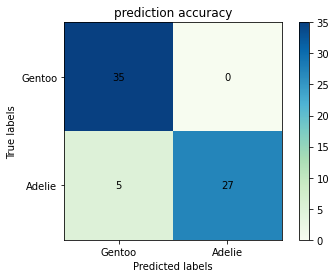

In [353]:
confusion_matrix = np.array([[35, 0], [5, 27]])

# Define class labels
class_labels = ['Gentoo', 'Adelie']

# Plotting the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='GnBu')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Loop over data dimensions and create text annotations
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

# Set axis labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set title
ax.set_title('prediction accuracy')

plt.savefig('prediction_matrix.png', format='png', dpi=300)


# Display the matrix
plt.show()

In [300]:
#75 
pp_X_train, pp_X_test =  platform_preprocess(X_bias_75, X_test)
mlp_classification(pp_X_train, Y_bias_75, pp_X_test, Y_test, neural_net_layers_specification)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(array([[35,  0],
        [ 5, 27]]),
 0.9253731343283582)

In [301]:
#90 
pp_X_train, pp_X_test =  platform_preprocess(X_bias_90, X_test)
mlp_classification(pp_X_train, Y_bias_90, pp_X_test, Y_test, neural_net_layers_specification)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(array([[35,  0],
        [14, 18]]),
 0.7910447761194029)

In [308]:
#balanced 75
pp_X_train, pp_X_test =  platform_preprocess(X_balanced_75, X_test)
mlp_classification(pp_X_train, Y_balanced_75, pp_X_test, Y_test, neural_net_layers_specification)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(array([[35,  0],
        [ 7, 25]]),
 0.8955223880597015)

In [310]:
#balanced 90
pp_X_train, pp_X_test =  platform_preprocess(X_balanced_90, X_test)
mlp_classification(pp_X_train, Y_balanced_90, pp_X_test, Y_test, neural_net_layers_specification)

/Users/andrewgoldblatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(array([[35,  0],
        [ 0, 32]]),
 1.0)

In [314]:
data = ["X_bias_0","X_bias_75","X_bias_90","X_balanced_75","X_balanced_90"]
results = [1.0,0.9253731343283582,0.7910447761194029, 0.8955223880597015,1.0]

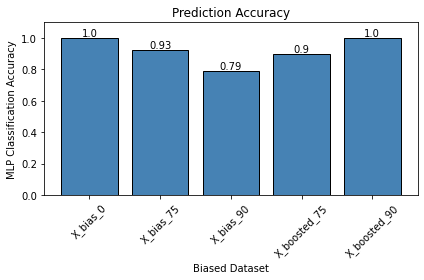

In [323]:
data = ["X_bias_0", "X_bias_75", "X_bias_90", "X_boosted_75", "X_boosted_90"]
results = [1.0, 0.9253731343283582, 0.7910447761194029, 0.8955223880597015, 1.0]

fig, ax = plt.subplots()
ax.bar(data, results, color='steelblue', edgecolor='black')

plt.xlabel('Biased Dataset')
plt.ylabel('MLP Classification Accuracy')
plt.title('Prediction Accuracy')

for i in range(len(data)):
    ax.text(i, results[i], str(round(results[i], 2)), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylim(0, 1.1) 
plt.tight_layout() 

plt.savefig('bias_boost.jpg', format='jpeg', dpi=300)

plt.savefig('bias_boost.png', format='png', dpi=300)


plt.show()